


## Identifying  the Fake News Detection Factors



In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
import nltk
from nltk.tokenize import RegexpTokenizer
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
# from graphviz import Source
from IPython.display import display
# from graphviz import Digraph



In [2]:
import seaborn as sb

path_train='train.tsv'
path_test='test.tsv'
path_valid='valid.tsv'


train_data = pd.read_csv(path_train, sep='\t', header = None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [3]:
test_data = pd.read_csv(path_test, sep='\t', header = None)
test_data.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc7 in position 28: invalid continuation byte

In [4]:
valid_data = pd.read_csv(path_valid, sep='\t', header = None)
valid_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,FALSE,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


# Data Prepration
    



In [5]:
#adding columns to train 
columns = ['id', 'label', 'statement', 'subjects', 'speaker',
         'speaker_job', 'state', 'party', 'barely_true_counts',
         'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
         'context']
train_data.columns = columns
train_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [6]:
##adding columns to test 


test_data.columns = columns
test_data.head()

NameError: name 'test_data' is not defined

In [7]:
# add column to valid data

valid_data.columns = columns
valid_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,FALSE,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


# Adding a numeric label column
we convert the categorical labels to numeric labels. use to train classifires. 

The conversion method was based on a simple division of 100 to 6 (as we have 6 classes).

In [9]:
def label_to_numeric(label):
    if label=="true":
        return(100)
    elif label=="mostly-true":
        return(66)
    elif label=="half-true":
        return(50)
    elif label=="barely-true":
        return(33)
    elif label=="false":
        return(16)
    else:
        return(0)
    

train_data['label-numeric'] = train_data['label'].apply(lambda x : label_to_numeric(x))
train_data.head()

#test_data['label-numeric'] = test_data['label'].apply(lambda x : label_to_numeric(x))
#test_data.head()

valid_data['label-numeric'] = valid_data['label'].apply(lambda x : label_to_numeric(x))
valid_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,33
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0
2,7891.json,FALSE,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,50
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,50


# Visualizing the data


In [10]:
#train data vizualization

sb.countplot(x='label', data=test_data, palette='hls')

NameError: name 'test_data' is not defined

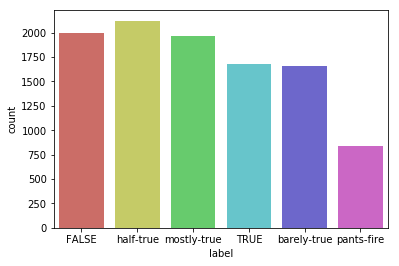

In [11]:
##test data vizualization

sb.countplot(x='label', data=train_data, palette='hls')

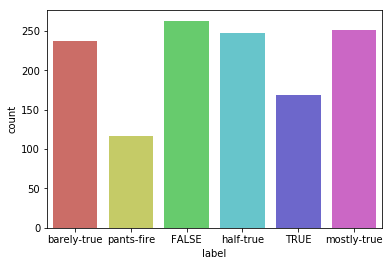

In [12]:
#valid data vizualization
sb.countplot(x='label', data=valid_data, palette='hls')

# Word Cloud Visualization for getting a sense of the statements

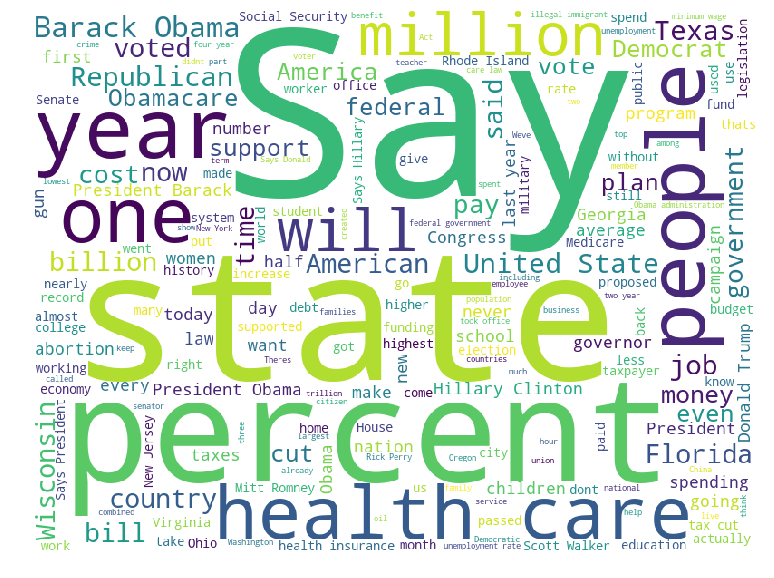

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(train_data['statement']))

In [14]:
cloud(' '.join(test_data['statement']))

NameError: name 'test_data' is not defined

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(train_data['statement'])

# The total number of words per statement

# Adding the total number of words per statement as a new culumn to the datasets (data enrichment)

In [17]:
train_data['word_number'] = train_data['statement'].apply(lambda x : len(x.split()))
train_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0,11
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,50,24
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,66,19
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0,12
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,50,10


In [18]:
test_data['word_number'] = test_data['statement'].apply(lambda x : len(x.split()))
test_data.head()

NameError: name 'test_data' is not defined

In [19]:
valid_data['word_number'] = valid_data['statement'].apply(lambda x : len(x.split()))
valid_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,33,10
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0,26
2,7891.json,FALSE,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0,32
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,50,8
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,50,33


## The average number of characters per word per statement

### creating a new column in dataset for average word length

In [20]:
train_data['average_word_length'] = train_data['statement'].apply(lambda x : sum(len(word) for word in x.split()) / len(x.split()))
train_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0,11,6.545455
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,50,24,4.916667
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,66,19,4.578947
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0,12,5.583333
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,50,10,4.500000


In [ ]:
test_data['average_word_length'] = test_data['statement'].apply(lambda x : sum(len(word) for word in x.split()) / len(x.split()))
test_data.head()

In [21]:
valid_data['average_word_length'] = valid_data['statement'].apply(lambda x : sum(len(word) for word in x.split()) / len(x.split()))
valid_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,33,10,4.200000
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0,26,4.730769
2,7891.json,FALSE,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0,32,5.406250
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,50,8,4.875000
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,50,33,4.787879


##  The long-words frequency per statement


### creating a new column in dataset for long word frequency

In [22]:
def long_word_detector(word):
    if len(word) > 8:
        return(1)
    else:
        return(0)
    
train_data['long_words_frequency'] = train_data['statement'].apply(lambda x : sum(long_word_detector(word) for word in x.split()))
train_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length,long_words_frequency
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0,11,6.545455,3
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,50,24,4.916667,2
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,66,19,4.578947,0
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0,12,5.583333,2
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,50,10,4.500000,1


In [23]:
test_data['long_words_frequency'] = test_data['statement'].apply(lambda x : sum(long_word_detector(word) for word in x.split()))
test_data.head()

NameError: name 'test_data' is not defined

In [24]:
valid_data['long_words_frequency'] = valid_data['statement'].apply(lambda x : sum(long_word_detector(word) for word in x.split()))
valid_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length,long_words_frequency
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,33,10,4.200000,1
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0,26,4.730769,3
2,7891.json,FALSE,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0,32,5.406250,4
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,50,8,4.875000,0
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,50,33,4.787879,3


#  Frequency of unique words per statement
A word has been defined as unique, if it has been used only and only in one of the statements.



## Data preperation for extracting frequency of unique words
### Removing numbers and punctuations; conversion to string

In [25]:
all_statements_list = ""

all_statements_list = valid_data['statement'].apply(lambda x : all_statements_list + re.sub(r'\d+', '', x)) #removing numbers using regular expressions

all_statements = ''.join(all_statements_list) #converting the statement list to a string

tokenizer = RegexpTokenizer(r'\w+')
tokenized_no_punctuation= tokenizer.tokenize(all_statements)

all_statements_cleaned = ' '.join(tokenized_no_punctuation) #removing punctuation using NLTK tokenizer

print(all_statements_cleaned)

We have less Americans working now than in the s When Obama was sworn into office he DID NOT use the Holy Bible but instead the Kuran Their equivalency to our Bible but very different beliefs Says Having organizations parading as being social welfare organizations and then being involved in the political combat harkens back to why the statute a hundred years ago said that they were prohibited Says nearly half of Oregons children are poor On attacks by Republicans that various programs in the economic stimulus plan are not stimulative If you add all that stuff up it accounts for less than percent of the overall package Says when armed civilians stop mass shootings with guns an average of people die otherwise an average of people die Says Tennessee is providing millions of dollars to virtual school company for results at the bottom of the bottom The health care reform plan would set limits similar to the socialized system in Britain where people are allowed to die if their treatment woul

### Stemming and making the Bag-of-words model

For three of the lexical features (out of 4 features) we shouldn't preprocess the statement texts (e.g. stemming) since we aimed to extract these features from the text as it is. Feature 4 (Frequency of unique words per statement) needed preprocessing, including removing numbers and punctuations, conversion to string, stemming, etc.


It should be considered that since the Bag-of-words model has only been used for identification of unique words, there is no need to remove stop words from the data.

In [26]:
sno = nltk.stem.SnowballStemmer('english') #using the snowballStemmer to stem the words
s1 = all_statements.split(' ')
statement_data_frame = pd.DataFrame(s1) 
s2 = statement_data_frame[0].apply(lambda x: sno.stem(x))
counts =  Counter(s2)
print(counts)

Counter({'the': 1091, 'of': 592, 'to': 546, 'in': 523, 'a': 444, 'and': 336, '': 335, 'for': 247, 'that': 231, 'is': 212, 'on': 169, 'has': 149, 'than': 148, 'have': 143, 'are': 130, 'was': 121, 'by': 116, 'state': 115, 'percent': 112, 'more': 112, 'it': 110, 'health': 98, 'with': 95, 'from': 95, ',': 92, 'tax': 92, '$': 90, 'not': 88, 'obama': 86, 'as': 86, 'be': 80, 'we': 78, 'year': 76, 'will': 76, 'job': 75, 'their': 73, 'our': 72, 'care': 72, 'new': 69, 'million': 65, 'at': 64, 'would': 63, 'vote': 61, 'he': 60, 'peopl': 60, 'presid': 59, 'were': 58, 'or': 54, 'no': 54, 'one': 53, 'i': 53, 'american': 52, 'you': 52, 'his': 52, 'feder': 52, 'who': 52, 'been': 52, 'up': 51, 'support': 50, 'this': 49, 'plan': 47, 'go': 46, 'spend': 46, 'out': 46, 'they': 45, 'an': 45, 'bill': 45, 'had': 45, 'rate': 45, 'nation': 44, 'republican': 43, 'over': 43, 'last': 43, 'billion': 42, 'democrat': 40, '.': 39, 'u.s.': 39, 'govern': 38, 'about': 38, 'budget': 38, 'school': 37, 'ani': 37, 'say': 37,

## Adding the Frequency of unique words per statement to the datasets (data enrichment)

In [27]:
def unique_word_detector(word):
    if counts[word] == 1:
        return(1)
    else:
        return(0)

train_data['unique_words_frequency'] = train_data['statement'].apply(lambda x : sum(unique_word_detector(word) for word in x.split()))
train_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length,long_words_frequency,unique_words_frequency
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0,11,6.545455,3,0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,50,24,4.916667,2,2
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,66,19,4.578947,0,0
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0,12,5.583333,2,0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,50,10,4.500000,1,1


In [28]:
test_data['unique_words_frequency'] = test_data['statement'].apply(lambda x : sum(unique_word_detector(word) for word in x.split()))
test_data.head()

NameError: name 'test_data' is not defined

In [29]:

valid_data['unique_words_frequency'] = valid_data['statement'].apply(lambda x : sum(unique_word_detector(word) for word in x.split()))
valid_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label-numeric,word_number,average_word_length,long_words_frequency,unique_words_frequency
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,33,10,4.200000,1,0
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0,26,4.730769,3,0
2,7891.json,FALSE,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0,32,5.406250,4,0
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,50,8,4.875000,0,0
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,50,33,4.787879,3,2


In [30]:
#Data slicing
x_train = train_data.values[:, 15:19]
y_train = train_data.values[:,1]
#y_train=y_train.astype('float') #only needed if we want to use numeric labels

x_test = test_data.values[:, 15:19]
y_test = test_data.values[:,1]
#y_test=y_test.astype('float')



NameError: name 'test_data' is not defined

In [31]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

print ("Accuracy Score:", gnb.score(x_test, y_test))
print(metrics.classification_report(y_test,gnb_pred))

NameError: name 'x_test' is not defined

In [32]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn import linear_model

lm = linear_model.LogisticRegression(verbose=1)
model = lm.fit(x_train, y_train)
#print (model)
predictions = lm.predict(x_test)

print ("accuracy Score:", lm.score(x_test, y_test))

print(metrics.classification_report(y_test,predictions))

[LibLinear]

NameError: name 'x_test' is not defined

In [33]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=10, min_samples_leaf=70)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=70, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [ ]:
y_pred = clf_gini.predict(x_test)

print("Accuracy is ", accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

# Word2Vec

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

In [ ]:
countV = CountVectorizer()
train_count = countV.fit_transform(train_data['statement'].values)

In [ ]:
print(countV)
print(train_count)

In [ ]:
# Vocab size
train_count.shape

# Check vocabulary using below command
print(countV.vocabulary_)

In [ ]:
#building classifier using naive bayes 
from sklearn.naive_bayes import MultinomialNB
nb_pipeline = Pipeline([
        ('NBCV',countV),
        ('nb_clf',MultinomialNB())])


In [ ]:
nb_pipeline.fit(train_data['statement'],train_data['label'])
predicted_nb = nb_pipeline.predict(test_data['statement'])
np.mean(predicted_nb == test_data['label'])

In [ ]:
#using SVM Stochastic Gradient Descent on hinge loss
from sklearn.linear_model import SGDClassifier
sgd_pipeline = Pipeline([
        ('svm2CV',countV),
        ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
        ])

sgd_pipeline.fit(train_data['statement'],train_data['label'])
predicted_sgd = sgd_pipeline.predict(test_data['statement'])
np.mean(predicted_sgd == test_data['label'])

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier

random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest.fit(train_data['statement'],train_data['label'])
predicted_rf = random_forest.predict(test_data['statement'])
np.mean(predicted_rf == test_data['label'])

In [ ]:
#Data slicing
x_train = train_data.values[:, 15:19]
y_train = train_data.values[:,1]
#y_train=y_train.astype('float') #only needed if we want to use numeric labels

x_test = test_data.values[:, 15:19]
y_test = test_data.values[:,1]
#y_test=y_test.astype('float')


In [ ]:
def lexical_factor_vector_score(word_number,average_word_length,long_words_frequency,unique_words_frequency):
    return(word_number/10+average_word_length/5+long_words_frequency+9*unique_words_frequency)

train_data['lexical_factor_vector_score'] = train_data.apply(lambda row: lexical_factor_vector_score(row['word_number'],row['average_word_length'], row['long_words_frequency'], row['unique_words_frequency']), axis=1)
train_data.head()

In [ ]:
test_data['lexical_factor_vector_score'] = test_data.apply(lambda row: lexical_factor_vector_score(row['word_number'],row['average_word_length'], row['long_words_frequency'], row['unique_words_frequency']), axis=1)
test_data.head()

In [ ]:
valid_data['lexical_factor_vector_score'] = valid_data.apply(lambda row: lexical_factor_vector_score(row['word_number'],row['average_word_length'], row['long_words_frequency'], row['unique_words_frequency']), axis=1)
valid_data.head()

In [ ]:
#Data slicing
x_traine = train_data.values[:, 14:20]
y_traine = train_data.values[:,1]

x_teste = test_data.values[:, 14:20]
y_teste = test_data.values[:,1]
#y_test=y_test.astype('float')


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn import linear_model

lm = linear_model.LogisticRegression(verbose=1)
model = lm.fit(x_traine, y_traine)
print (model)
predictions_lo = lm.predict(x_teste)

print ("accuracy Score:", model.score(x_teste, y_teste))

print(confusion_matrix(y_teste,predictions_lo))



In [ ]:
print(metrics.classification_report(y_teste,predictions_lo))

In [ ]:
def content(msg):
    msg = vectorizer.transform([msg])
    prediction = model.predict(msg)
    return prediction[0]

In [ ]:
####RandomForestClassifier   with countv¶
def content(content):
    random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
    random_forest.fit(train_data['statement'],train_data['label'])
    predicted_rf = random_forest.predict(test_data['statement'])
    return predicted_rf[0]

In [ ]:
input_news='Hillary Clinton in 2005 co-sponsored legislation that would jail flag burners.'
content(input_news)